In [2]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [254]:
data = pd.read_csv("C:\\Users\\joshi\\Mall-Customers-Segmentation\\Dataset\\Mall_Customers.csv")

In [256]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [258]:
data.shape

(200, 5)

In [260]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [262]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [264]:
# Check for missing values (null values)
missing_values = data.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [266]:
X1 = data.iloc[:, [3,4]].values 

In [268]:
X1

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [270]:
# Calculate correlation between specific columns
correlation = data['Annual Income (k$)'].corr(data['Spending Score (1-100)'])
print(f"Correlation between Annual Income and Spending Score: {correlation*100}")

Correlation between Annual Income and Spending Score: 0.9902848094037608


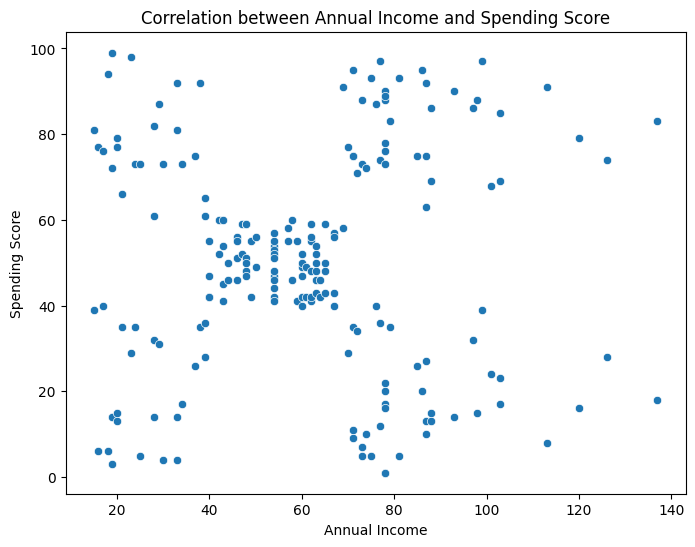

In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Scatter plot between 'Annual Income' and 'Spending Score'
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Annual Income (k$)'], y=data['Spending Score (1-100)'])
plt.title('Correlation between Annual Income and Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()


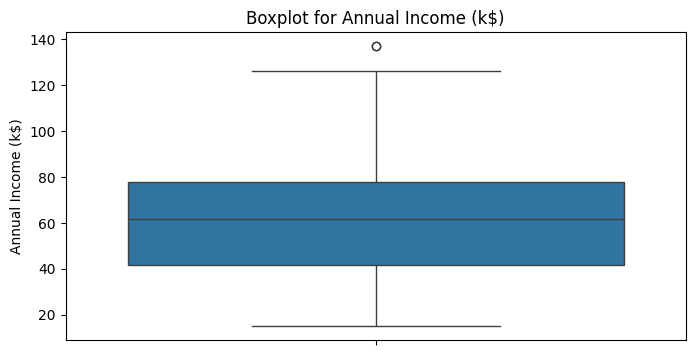

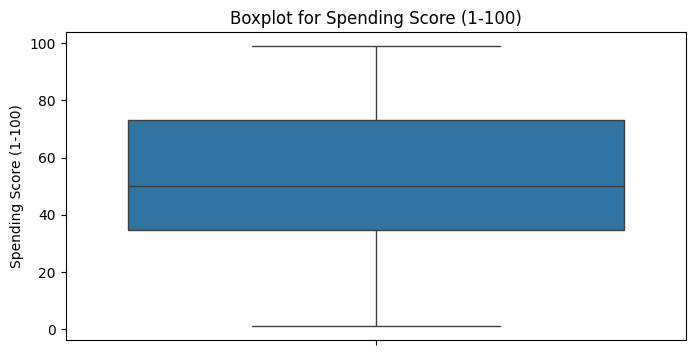

In [274]:
# Visualize potential outliers using boxplot
numerical_columns = data[['Annual Income (k$)', 'Spending Score (1-100)']]  # List your numerical columns here
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [276]:
from scipy.stats import zscore

# Calculate the Z-scores for numerical columns to detect outliers
numerical_data = data[['Annual Income (k$)', 'Spending Score (1-100)']]
z_scores = zscore(numerical_data)

# Identify rows where the Z-score is greater than 3 or less than -3 (typically considered outliers)
outliers = (z_scores > 3) | (z_scores < -3)
outliers_rows = outliers.any(axis=1)
print(f"\nNumber of outlier rows: {outliers_rows.sum()}")
print("Outlier rows:")
print(data[outliers_rows])


Number of outlier rows: 0
Outlier rows:
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


In [278]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Annual Income (k$)', 'Spending Score (1-100)']])

In [280]:
print(scaled_data)

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

In [282]:
from sklearn.cluster import KMeans

In [284]:
wcss=[]  #within cluster sum of squares

In [286]:
for i in range(1,11):
    km=KMeans(n_clusters=i, init="k-means++", random_state=0)
    km.fit(X1)
    wcss.append(km.inertia_)

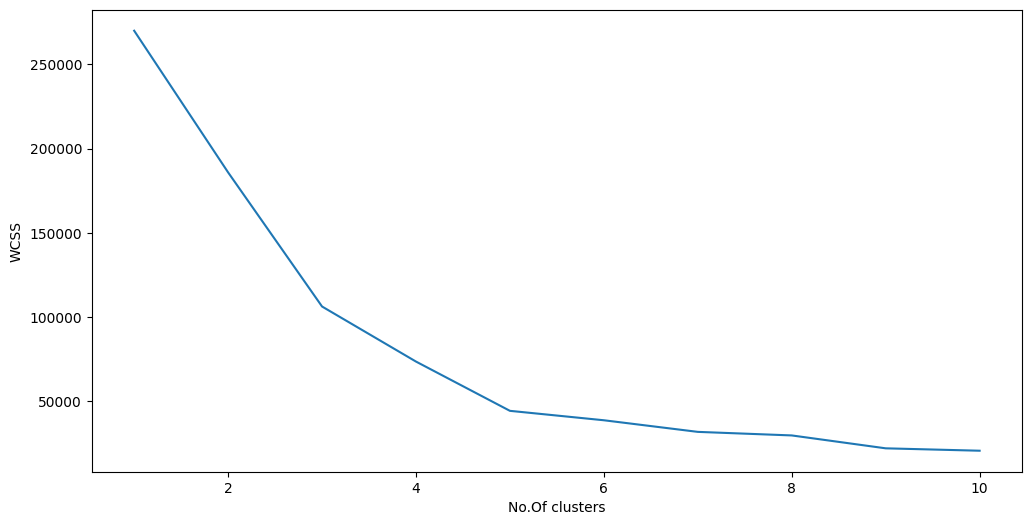

In [288]:
#The elbow curve
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.xlabel("No.Of clusters")
plt.ylabel("WCSS")
plt.show()

In [290]:
kmeans = KMeans(n_clusters = 5, init="k-means++", random_state=0)

In [292]:
y_kmeans=kmeans.fit_predict(X1)
data['Clusters']=y_kmeans
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


In [294]:
print("Cluster Centers:", kmeans.cluster_centers_)

Cluster Centers: [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]


In [296]:
# Group data points by cluster label and calculate the mean of their features
cluster_analysis = data.groupby('Clusters')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_analysis)

          Annual Income (k$)  Spending Score (1-100)
Clusters                                            
0                  55.296296               49.518519
1                  86.538462               82.128205
2                  88.200000               17.114286
3                  26.304348               20.913043
4                  25.727273               79.363636


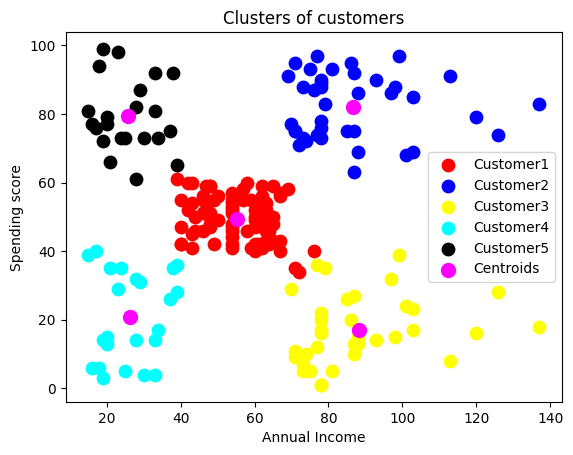

In [298]:
plt.scatter(X1[y_kmeans == 0,0], X1[y_kmeans == 0,1], s=80, c="red", label="Customer1")
plt.scatter(X1[y_kmeans == 1,0], X1[y_kmeans == 1,1], s=80, c="blue", label="Customer2")
plt.scatter(X1[y_kmeans == 2,0], X1[y_kmeans == 2,1], s=80, c="yellow", label="Customer3")
plt.scatter(X1[y_kmeans == 3,0], X1[y_kmeans == 3,1], s=80, c="cyan", label="Customer4")
plt.scatter(X1[y_kmeans == 4,0], X1[y_kmeans == 4,1], s=80, c="black", label="Customer5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='magenta', label="Centroids")
plt.title('Clusters of customers')
plt.xlabel("Annual Income")
plt.ylabel('Spending score')
plt.legend()
plt.show()

In [44]:
kmeans.predict([[5,89]])

array([4])

In [36]:
import joblib

In [212]:
joblib.dump(kmeans, 'finalclustering.pkl')

['finalclustering.pkl']